In [2]:
%cd /Users/andrewma/Desktop/stat222/Economic_Networks
from econnet import data
from econnet import simulator
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.pyplot as plt

/Users/andrewma/Desktop/stat222/Economic_Networks


In [4]:
# Set plotting font sizes and properties
TINY_SIZE = 12
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
MARKER_SIZE = 20
LINE_SIZE = 4

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=TINY_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("lines", markersize=MARKER_SIZE)  # marker size
plt.rc("lines", linewidth=LINE_SIZE)  # line width

mpl.rcParams["figure.dpi"] = 180 # sets the image quality

# Height and width per row and column of subplots
FIG_HEIGHT = 18
FIG_WIDTH = 16
fig_fcn = lambda kwargs: plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT), **kwargs)
color_list = sns.color_palette("Paired")

In [50]:
def get_min_elements_index(array, n):
    array_sort = np.sort(array)
    array_sort = array_sort[:n]
    ##
    index_min_elements = []
    for small_thing in array_sort:
        index_small = np.where(array == small_thing)
        index_small = int(index_small[0])
        index_min_elements.append(index_small)
        
    return index_min_elements

industry_names = data.pd.Series(data.Table.industries)

def plot_experiment(name = "Funds & trusts", n=10, shock = -0.3, year = 2020):
    
    temp = np.where(industry_names == name)
    index_name = int(temp[0])
    print(f'Industry: {name}, Degree: {shock}')
    
    ## define the background var's
    u = data.Use(year)
    y = u.table.loc["Value Added (producer prices)", :][:data.Table.nInd]
    ys = []
    H = data.I2IReqs(year).make_adjacency()
    dz = np.zeros(y.shape[0])
    dz[index_name] = shock
    
    ## Delta function shock
    one_run = simulator.simulateOneTime(y=y, H=H, dz=dz)
    global dly 
    dly = one_run.copy()
    oar = np.array(one_run)
    ##
    shock_effs_relative = oar / oar[0, :]
    shock_effs_relative = pd.DataFrame(shock_effs_relative)
    shock_effs_relative.columns = industry_names

    ## base on the last order, get the most effected industries
    index_most_effected = get_min_elements_index(shock_effs_relative.iloc[-1,:], n=n)

    global shocks
    shocks = shock_effs_relative.iloc[:,index_most_effected].columns
    plt.figure(figsize=(6,4) ,dpi = 100)
    plt.plot(shock_effs_relative, marker="x")
    plt.xlabel("effect order")
    plt.ylabel("Relative Change of 'Value Added'")
    plt.yscale('log')
    plt.title("Delta-function shock effects (relative)")
    plt.show()
    
    plt.figure(figsize=(10,8), dpi = 100)
    plt.plot(shock_effs_relative.iloc[:,index_most_effected], marker="x")
    plt.xlabel("effect order")
    plt.ylabel("Relative Change of 'Value Added'")
    plt.yscale('log')
    plt.title("Delta-function shock effects (relative)")
    
    ## make the legend outside left
    plt.legend(shock_effs_relative.columns[index_most_effected], bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.show()

In [51]:
u = data.Use(2020)
s = data.Supply(2020)
c = data.C2CReqs(2020)
i = data.I2IReqs(2020)
t = data.I2I(2020)

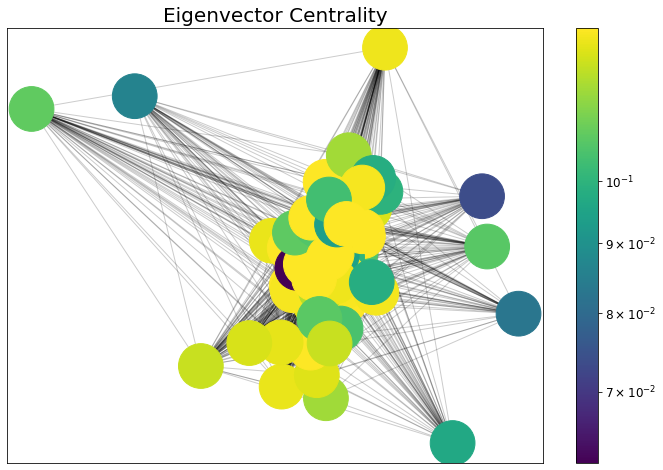

In [52]:
## centrality plot function
%matplotlib inline
def draw(G, pos, measures, measure_name):
    labels = nx.get_edge_attributes(G, "weight")
    nodes = nx.draw_networkx_nodes(G, pos, node_size=2000, 
                                   #cmap=plt.cm.plasma, 
                                   #node_color=labels,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys(), 
                                   with_labels = True)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)

    plt.title(measure_name)
    plt.colorbar(nodes)
    #plt.axis('off')
    plt.show()

plt.rcParams["figure.figsize"] = (12,8)
G = u.graph
pos = nx.spring_layout(G, seed = 1)
DiG = nx.DiGraph()

## test cases
#draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
#draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

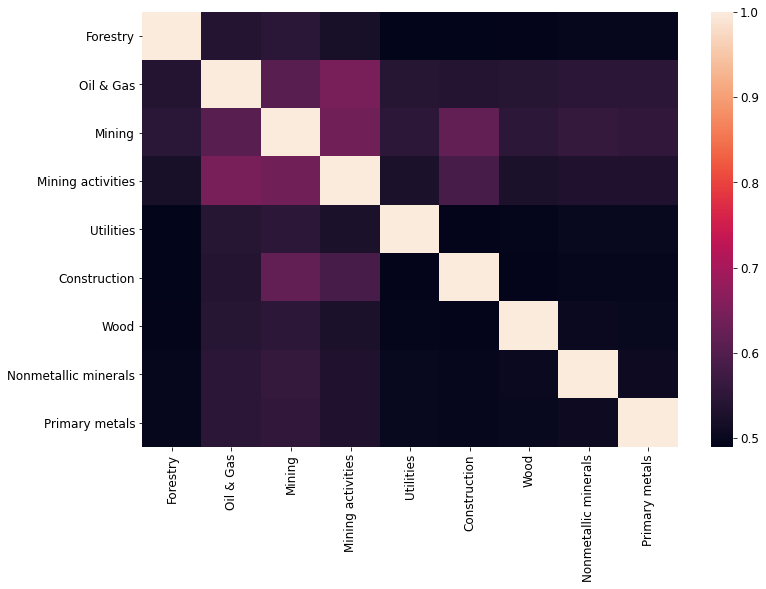

In [53]:
df = s.table
corr = df.iloc[:,1:10].corr()
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns,
                yticklabels=corr.columns)

Industry: Wood, Degree: -0.13


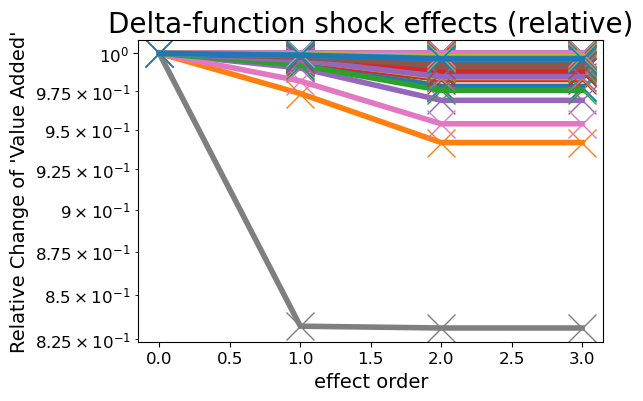

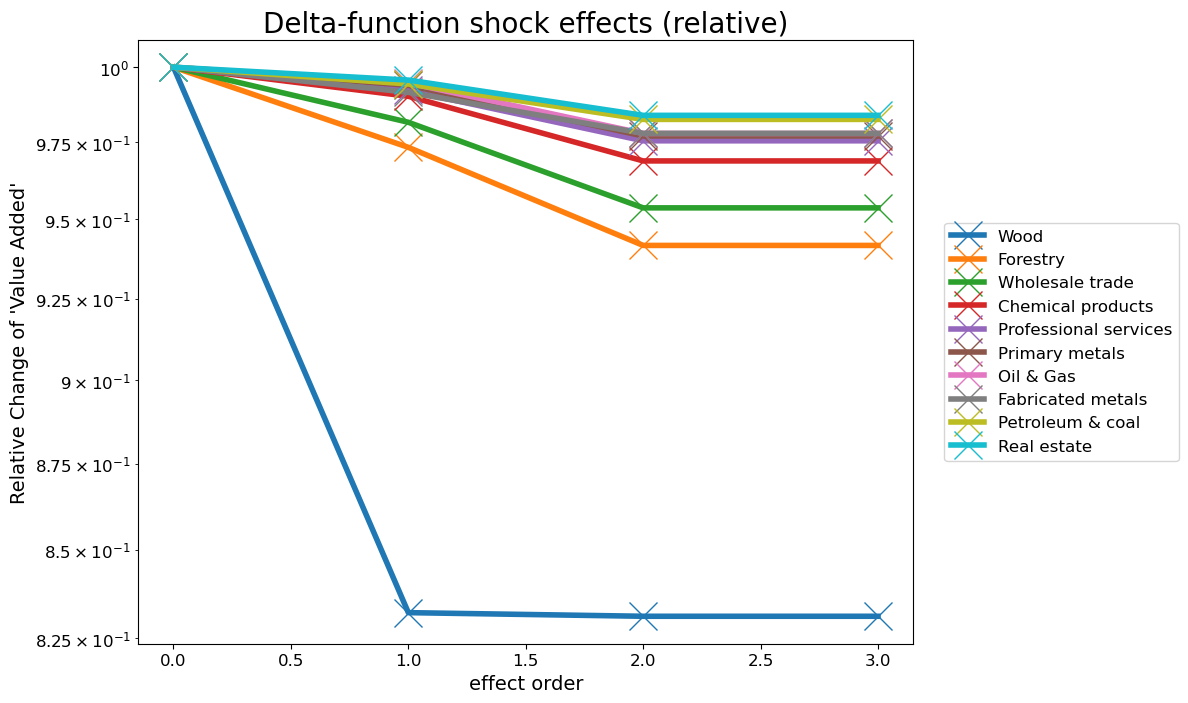

In [54]:
plot_experiment(name = "Wood", shock = -0.13, n = 10, year = 2006)

In [55]:
## A is from I2I reqs of that year 
s = shocks.to_list()
A = t.table[s].loc[s]
A

,Wood,Forestry,Wholesale trade,Chemical products,Professional services,Primary metals,Oil & Gas,Fabricated metals,Petroleum & coal,Real estate
Wood,47893.984639,145.678469,562.068762,101.921478,94.851445,535.310824,3.294918,187.178563,1.027578,1434.762762
Forestry,18972.661690,16883.656394,0.039816,105.445233,20.372588,0.051180,0.160638,0.037619,6.539529,1.492622
Wholesale trade,32537.415239,16040.812050,182016.300263,36087.467873,9451.545179,38989.944990,13087.186257,28582.460864,5078.512017,5949.546027
Chemical products,9320.863219,16879.160999,2224.544604,136098.629156,9563.393855,2920.850444,18767.122490,10579.742070,10517.521261,6465.229351
Professional services,14736.283083,5012.790330,39062.459069,8843.359327,56704.503363,12613.457266,17494.045210,17534.070420,5337.612082,45992.265996
Primary metals,989.446237,53.094265,187.394942,77.244781,187.742483,66060.781256,6157.202653,42335.624713,100.837476,455.548540
Oil & Gas,122.276089,129.068164,59.895716,1774.822647,41.611583,169.796814,40712.876391,51.691046,153300.578570,112.377712
Fabricated metals,9155.714314,992.731849,879.603372,4604.641398,1374.067570,11917.195165,11765.102824,38772.029450,565.192022,1248.414801
Petroleum & coal,3709.552242,4070.394684,1477.892536,7683.731099,761.755424,3627.998195,11142.811334,1460.781181,21297.891027,2975.951905
Real estate,3108.722922,820.949004,36562.783710,2721.947411,20281.571628,1166.626690,4445.392004,7398.901428,192.675481,62247.807412


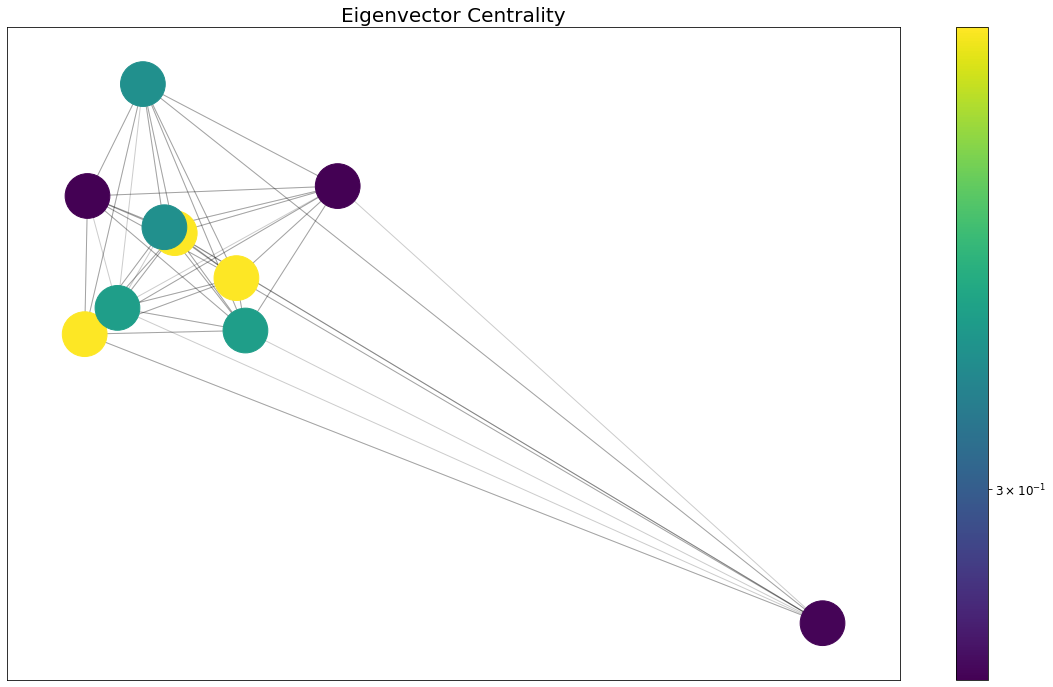

In [13]:
## Style 1
B = u.table[s].loc[s]
G = nx.from_pandas_adjacency(B, create_using=nx.DiGraph)
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

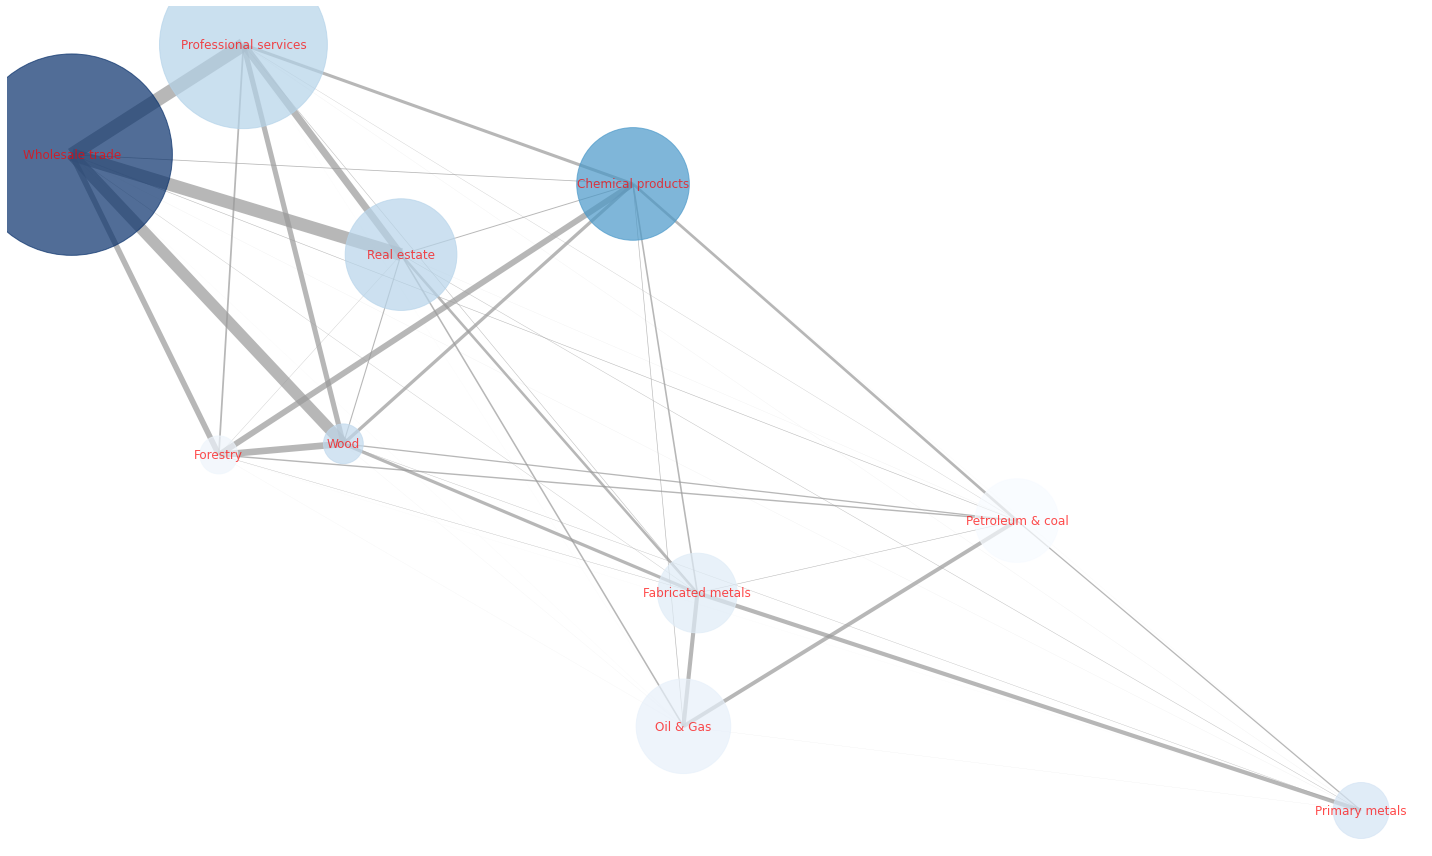

In [80]:
# Style 2
plt.figure(figsize = (20,12))
yy = pd.DataFrame(dly)
value_added = yy.iloc[0,:].to_dict()
#value_added = t.table[s].loc[s].sum(axis = 0).to_dict()
G = nx.from_pandas_adjacency(A)
# We have to set the population attribute for each of the 14 nodes
for i in list(G.nodes()):
    G.nodes[i]["value_added"] = value_added[i]

# node colour is a list of degrees of nodes
node_color = [G.degree(v, weight = 'weight') for v in G]
# size of node is a list of value added
node_size = [0.05 * nx.get_node_attributes(G, "value_added")[v] for v in G]
# width of edge is a list of weight of edges 
edge_width = [0.00035 * G[u][v]['weight'] for u, v in G.edges()]

nx.draw_networkx(G, node_size = node_size, 
                 node_color = node_color, alpha = 0.7, ## alpha decided by dz
                 with_labels = True, width = edge_width, ## node size decided by dy
                 edge_color ='.6', cmap = plt.cm.Blues, 
                 font_type = "bold",
                 font_color = "red")
  
plt.axis('off')
plt.tight_layout()